In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import plot_tree
import statsmodels.formula.api as smf

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline
pd.set_option('display.max_columns', None)
autism=pd.read_csv("https://raw.githubusercontent.com/jmald1987/ToddlerAutism/main/Toddler%20Autism%20dataset%20July%202018.csv")
autism.head()


,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


In [46]:
autism_new=pd.get_dummies(autism,columns=["Class/ASD Traits ","Jaundice",'Family_mem_with_ASD',],drop_first=True)
autism_new1=pd.get_dummies(autism_new,columns=["Sex","Ethnicity","Who completed the test"])

drop_list=['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10']
autism_new1=autism_new1.drop(drop_list,axis=1)
autism_new1.rename(columns={'Qchat-10-Score':'QchatScore','Class/ASD Traits _Yes':'ASDTrait',"Ethnicity_south asian":"Ethnicity_south_asian","Ethnicity_middle eastern":"Ethnicity_middle_eastern","Who completed the test_family member":"Who_completed_the_test_family_member","Ethnicity_Native Indian":"Ethnicity_Native_Indian","Ethnicity_White European":"Ethnicity_White_European"}, inplace=True)
#autism_new1=autism_new1[autism_new1['QchatScore']>3]
autism_new1


,Case_No,Age_Mons,QchatScore,ASDTrait,Jaundice_yes,Family_mem_with_ASD_yes,Sex_f,Sex_m,Ethnicity_Hispanic,Ethnicity_Latino,Ethnicity_Native_Indian,Ethnicity_Others,Ethnicity_Pacifica,Ethnicity_White_European,Ethnicity_asian,Ethnicity_black,Ethnicity_middle_eastern,Ethnicity_mixed,Ethnicity_south_asian,Who completed the test_Health Care Professional,Who completed the test_Health care professional,Who completed the test_Others,Who completed the test_Self,Who_completed_the_test_family_member
0,1,28,3,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,2,36,4,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,3,36,4,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,4,24,10,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,5,20,9,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,1050,24,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1050,1051,12,5,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1051,1052,18,9,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1052,1053,19,3,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [47]:
lm=smf.ols("QchatScore ~Age_Mons+ Sex_m+ASDTrait+Family_mem_with_ASD_yes+Jaundice_yes+Sex_f+Sex_m+Ethnicity_Hispanic+Ethnicity_Latino+Ethnicity_asian+Ethnicity_black+Ethnicity_middle_eastern+Ethnicity_mixed+Ethnicity_south_asian+Ethnicity_White_European+Ethnicity_Native_Indian+Ethnicity_Others+Ethnicity_Pacifica",data=autism_new1).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             QchatScore   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     139.8
Date:                Sat, 14 May 2022   Prob (F-statistic):          1.19e-236
Time:                        02:30:21   Log-Likelihood:                -2037.3
No. Observations:                1054   AIC:                             4107.
Df Residuals:                    1038   BIC:                             4186.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    1.4852      0.156      9.516      0.000       1.179       1.791
Age_Mons                    -0.0178      0.007     -2.621      0.009      -0.031      -0.004
Sex_m                        0.8317      0.099      8.415      0.000       0.638       1.026
ASDTrait                     5.0944      0.116     44.058      0.000       4.868       5.321
Family_mem_with_ASD_yes      0.1226      0.144      0.854      0.393      -0.159       0.404
Jaundice_yes                -0.3261      0.120     -2.723      0.007      -0.561      -0.091
Sex_f                        0.6535      0.096      6.840      0.000       0.466       0.841
Ethnicity_Hispanic           0.0309      0.273      0.113      0.910      -0.504       0.566
Ethnicity_Latino             0.3013      0.326      0.925      0.355      -0.338       0.941
Ethnicity_asian             -0.3348      0.154     -2.170      0.030      -0.638      -0.032
Ethnicity_black              0.2516      0.244      1.030      0.303      -0.228       0.731
Ethnicity_middle_eastern    -0.0657      0.168     -0.390      0.697      -0.396       0.265
Ethnicity_mixed             -0.1786      0.557     -0.321      0.749      -1.272       0.915
Ethnicity_south_asian        0.2230      0.234      0.954      0.340      -0.236       0.682
Ethnicity_White_European     0.2158      0.149      1.445      0.149      -0.077       0.509
Ethnicity_Native_Indian      0.3933      0.898      0.438      0.661      -1.369       2.155
Ethnicity_Others            -0.1864      0.289     -0.645      0.519      -0.754       0.381
Ethnicity_Pacifica           0.8348      0.557      1.500      0.134      -0.257       1.927
==============================================================================
Omnibus:                      105.784   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.530
Skew:                           0.089   Prob(JB):                     8.64e-08
Kurtosis:                       2.158   Cond. No.                     5.08e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.44e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [48]:
lm1=smf.ols("QchatScore ~Age_Mons+Sex_m+ASDTrait+Jaundice_yes+Sex_f+Sex_m+Ethnicity_asian",data=autism_new1).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             QchatScore   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     418.7
Date:                Sat, 14 May 2022   Prob (F-statistic):          7.30e-247
Time:                        02:30:34   Log-Likelihood:                -2041.4
No. Observations:                1054   AIC:                             4095.
Df Residuals:                    1048   BIC:                             4125.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.5510      0.135     11.473      0.000       1.286       1.816
Age_Mons           -0.0171      0.007     -2.566      0.010      -0.030      -0.004
Sex_m               0.8766      0.091      9.644      0.000       0.698       1.055
ASDTrait            5.1246      0.113     45.178      0.000       4.902       5.347
Jaundice_yes       -0.3069      0.119     -2.586      0.010      -0.540      -0.074
Sex_f               0.6744      0.087      7.795      0.000       0.505       0.844
Ethnicity_asian    -0.4709      0.119     -3.957      0.000      -0.704      -0.237
==============================================================================
Omnibus:                      111.604   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.336
Skew:                           0.087   Prob(JB):                     5.77e-08
Kurtosis:                       2.146   Cond. No.                     2.98e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.97e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [49]:
group_autism=autism.groupby(["Ethnicity","Class/ASD Traits ","Jaundice"])
group_autism_count=group_autism.size()
group_autism_count

Ethnicity       Class/ASD Traits   Jaundice
Hispanic        No                 no           10
                Yes                no           21
                                   yes           9
Latino          No                 no            6
                Yes                no           16
                                   yes           4
Native Indian   Yes                no            1
                                   yes           2
Others          No                 no            4
                                   yes           2
                Yes                no           18
                                   yes          11
Pacifica        No                 no            1
                Yes                no            4
                                   yes           3
White European  No                 no           57
                                   yes          27
                Yes                no          153
                                   yes

In [20]:
autism1=pd.get_dummies(autism,columns=["A1","A2","A3","A4","A5","A6","A7","A8","A9","A10","Sex","Jaundice",'Ethnicity','Family_mem_with_ASD','Who completed the test','Class/ASD Traits '],drop_first=True)
autism1

,Case_No,Age_Mons,Qchat-10-Score,A1_1,A2_1,A3_1,A4_1,A5_1,A6_1,A7_1,A8_1,A9_1,A10_1,Sex_m,Jaundice_yes,Ethnicity_Latino,Ethnicity_Native Indian,Ethnicity_Others,Ethnicity_Pacifica,Ethnicity_White European,Ethnicity_asian,Ethnicity_black,Ethnicity_middle eastern,Ethnicity_mixed,Ethnicity_south asian,Family_mem_with_ASD_yes,Who completed the test_Health care professional,Who completed the test_Others,Who completed the test_Self,Who completed the test_family member,Class/ASD Traits _Yes
0,1,28,3,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1,2,36,4,1,1,0,0,0,1,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1
2,3,36,4,1,0,0,0,0,0,1,1,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1
3,4,24,10,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,5,20,9,1,1,0,1,1,1,1,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,1050,24,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
1050,1051,12,5,0,0,1,1,1,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1
1051,1052,18,9,1,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1
1052,1053,19,3,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0


In [21]:
x=autism1.drop(columns=['Qchat-10-Score'])
x

,Case_No,Age_Mons,A1_1,A2_1,A3_1,A4_1,A5_1,A6_1,A7_1,A8_1,A9_1,A10_1,Sex_m,Jaundice_yes,Ethnicity_Latino,Ethnicity_Native Indian,Ethnicity_Others,Ethnicity_Pacifica,Ethnicity_White European,Ethnicity_asian,Ethnicity_black,Ethnicity_middle eastern,Ethnicity_mixed,Ethnicity_south asian,Family_mem_with_ASD_yes,Who completed the test_Health care professional,Who completed the test_Others,Who completed the test_Self,Who completed the test_family member,Class/ASD Traits _Yes
0,1,28,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1,2,36,1,1,0,0,0,1,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1
2,3,36,1,0,0,0,0,0,1,1,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1
3,4,24,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,5,20,1,1,0,1,1,1,1,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,1050,24,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
1050,1051,12,0,0,1,1,1,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1
1051,1052,18,1,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1
1052,1053,19,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0


In [22]:
y=autism1["Qchat-10-Score"]
y.head()

0     3
1     4
2     4
3    10
4     9
Name: Qchat-10-Score, dtype: int64

In [31]:
model = DecisionTreeRegressor(max_depth = 3)
model.fit(x, y)

DecisionTreeRegressor(max_depth=3)

[Text(581.25, 990.9375, 'Class/ASD Traits _Yes <= 0.5\nmse = 8.444\nsamples = 1054\nvalue = 5.213'),
 Text(290.625, 707.8125, 'A7_1 <= 0.5\nmse = 1.133\nsamples = 326\nvalue = 1.693'),
 Text(145.3125, 424.6875, 'A1_1 <= 0.5\nmse = 1.086\nsamples = 245\nvalue = 1.433'),
 Text(72.65625, 141.5625, 'mse = 0.94\nsamples = 198\nvalue = 1.187'),
 Text(217.96875, 141.5625, 'mse = 0.377\nsamples = 47\nvalue = 2.468'),
 Text(435.9375, 424.6875, 'A1_1 <= 0.5\nmse = 0.447\nsamples = 81\nvalue = 2.481'),
 Text(363.28125, 141.5625, 'mse = 0.478\nsamples = 66\nvalue = 2.379'),
 Text(508.59375, 141.5625, 'mse = 0.062\nsamples = 15\nvalue = 2.933'),
 Text(871.875, 707.8125, 'A3_1 <= 0.5\nmse = 3.689\nsamples = 728\nvalue = 6.788'),
 Text(726.5625, 424.6875, 'A9_1 <= 0.5\nmse = 2.119\nsamples = 338\nvalue = 5.719'),
 Text(653.90625, 141.5625, 'mse = 1.119\nsamples = 143\nvalue = 5.0'),
 Text(799.21875, 141.5625, 'mse = 2.196\nsamples = 195\nvalue = 6.246'),
 Text(1017.1875, 424.6875, 'A2_1 <= 0.5\nmse =

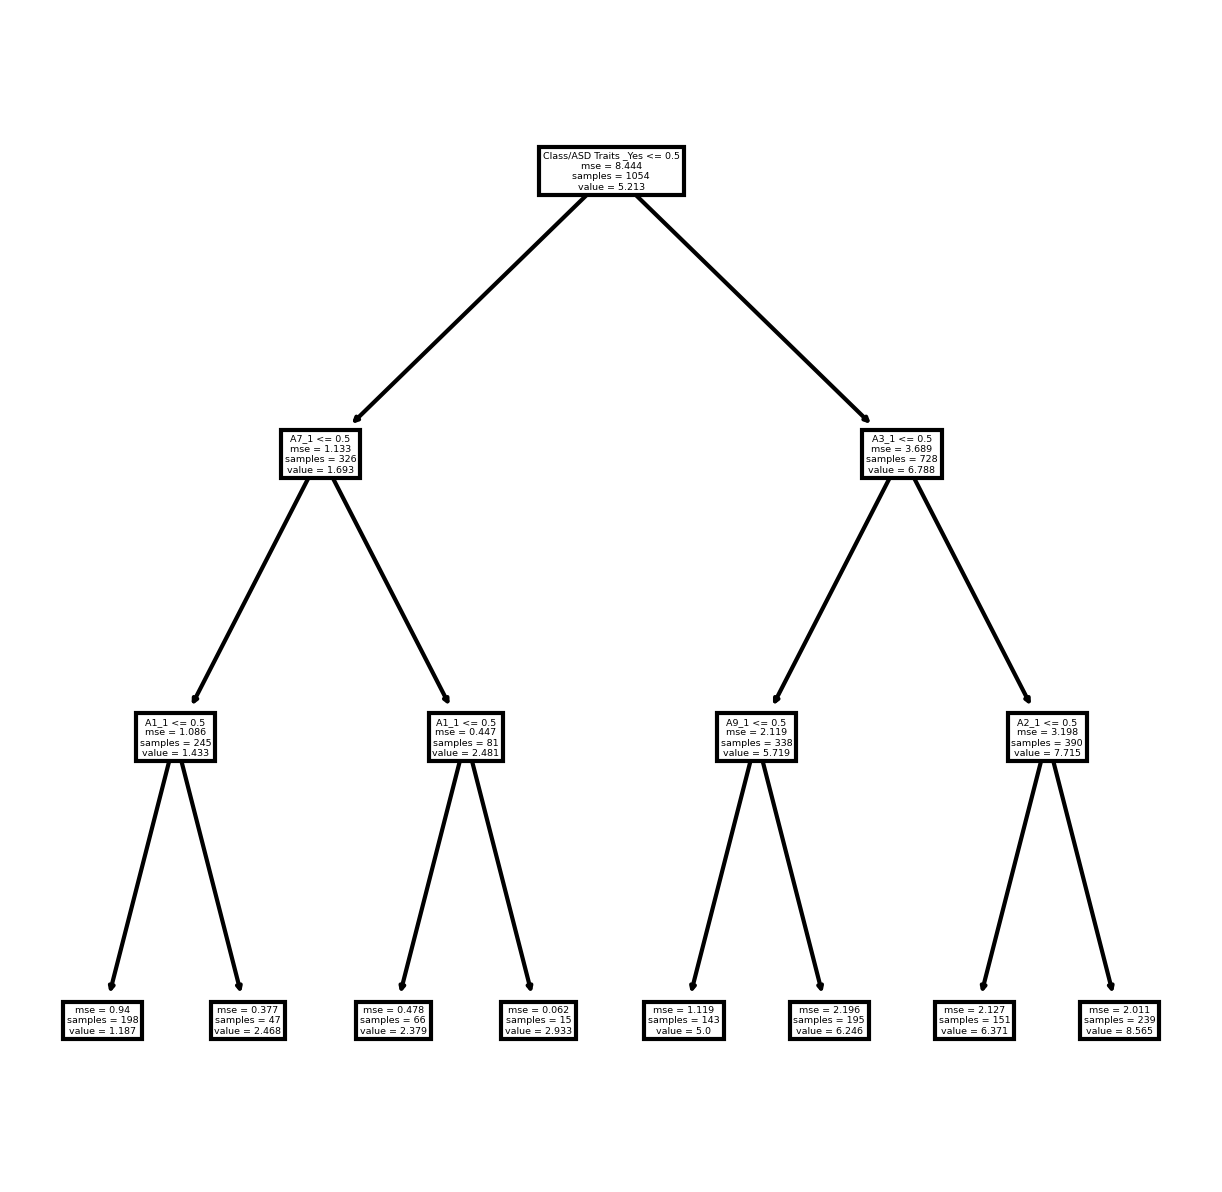

In [32]:
from sklearn.tree import plot_tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=300)
plot_tree(model,feature_names= x.columns)

In [42]:
autism2=autism1.drop(columns=['A1_1','A2_1','A3_1','A4_1','A5_1','A6_1','A7_1','A8_1','A9_1','A10_1','Case_No'])
x1=autism2.drop(columns=['Qchat-10-Score'])
y1=autism2["Qchat-10-Score"]
model1 = DecisionTreeRegressor(max_depth = 3)
model1.fit(x1, y1)

DecisionTreeRegressor(max_depth=3)

In [44]:
autism2

,Age_Mons,Qchat-10-Score,Sex_m,Jaundice_yes,Ethnicity_Latino,Ethnicity_Native Indian,Ethnicity_Others,Ethnicity_Pacifica,Ethnicity_White European,Ethnicity_asian,Ethnicity_black,Ethnicity_middle eastern,Ethnicity_mixed,Ethnicity_south asian,Family_mem_with_ASD_yes,Who completed the test_Health care professional,Who completed the test_Others,Who completed the test_Self,Who completed the test_family member,Class/ASD Traits _Yes
0,28,3,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1,36,4,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1
2,36,4,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1
3,24,10,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,20,9,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,24,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
1050,12,5,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1
1051,18,9,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1
1052,19,3,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0


[Text(581.25, 990.9375, 'Class/ASD Traits _Yes <= 0.5\nmse = 8.444\nsamples = 1054\nvalue = 5.213'),
 Text(290.625, 707.8125, 'Sex_m <= 0.5\nmse = 1.133\nsamples = 326\nvalue = 1.693'),
 Text(145.3125, 424.6875, 'Age_Mons <= 18.5\nmse = 1.109\nsamples = 125\nvalue = 1.432'),
 Text(72.65625, 141.5625, 'mse = 0.828\nsamples = 44\nvalue = 1.114'),
 Text(217.96875, 141.5625, 'mse = 1.177\nsamples = 81\nvalue = 1.605'),
 Text(435.9375, 424.6875, 'Ethnicity_mixed <= 0.5\nmse = 1.079\nsamples = 201\nvalue = 1.856'),
 Text(363.28125, 141.5625, 'mse = 1.055\nsamples = 199\nvalue = 1.874'),
 Text(508.59375, 141.5625, 'mse = 0.0\nsamples = 2\nvalue = 0.0'),
 Text(871.875, 707.8125, 'Age_Mons <= 29.5\nmse = 3.689\nsamples = 728\nvalue = 6.788'),
 Text(726.5625, 424.6875, 'Ethnicity_asian <= 0.5\nmse = 3.641\nsamples = 352\nvalue = 7.145'),
 Text(653.90625, 141.5625, 'mse = 3.51\nsamples = 275\nvalue = 7.335'),
 Text(799.21875, 141.5625, 'mse = 3.522\nsamples = 77\nvalue = 6.468'),
 Text(1017.1875,

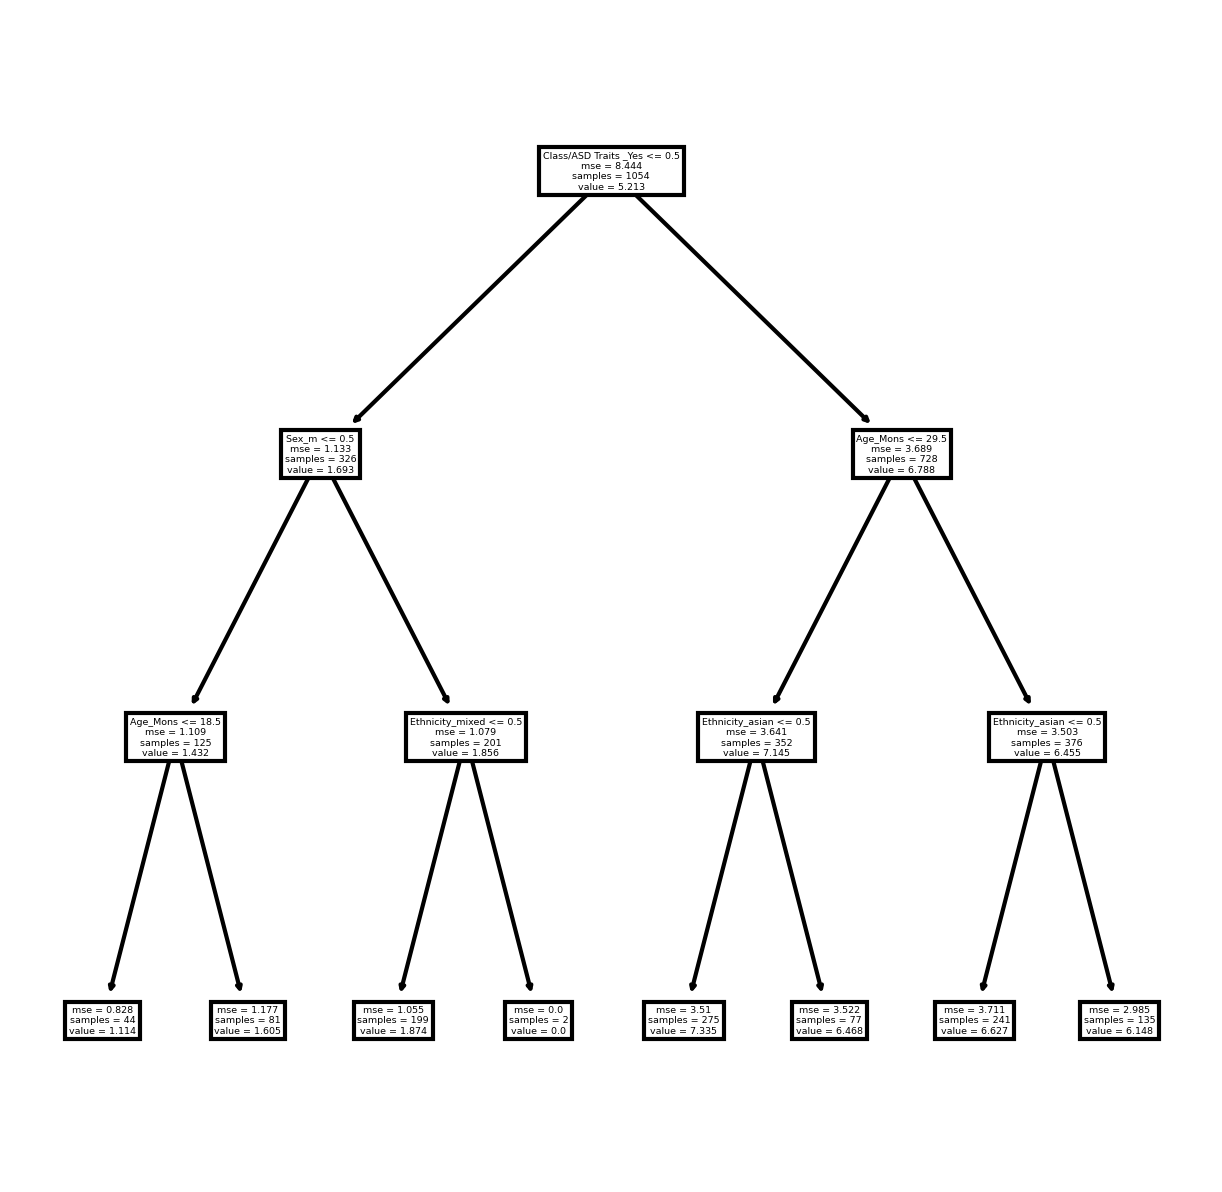

In [45]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=300)
plot_tree(model1,feature_names= x1.columns)